In [137]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from matplotlib import rcParams

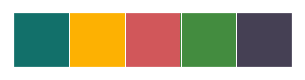

In [138]:
sns.set(style="darkgrid")
#custom colorscheme
custom_scheme = ["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"]
sns.palplot(custom_scheme)
sns.set_palette(palette=custom_scheme)
sns.set(font_scale=1.5)
# rcParams.update({'figure.autolayout': True})

In [139]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [140]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [141]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [142]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), men['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 335.287500, median: 124.500000
84 men, mean: 511.416667, median: 156.000000


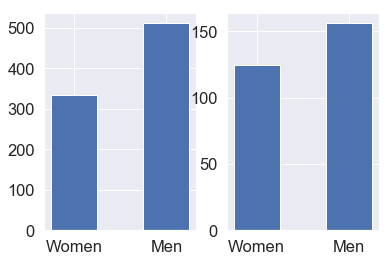

Ttest_indResult(statistic=1.189863660402363, pvalue=0.23584084769518676)


In [143]:
# words,edits,links

print(ttest(Athletes_100m,'words')) 

In [144]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [145]:
descriptions = []

for row in alldata.iterrows():
    desc = row[1][1] + ' ' + row[1][2]
    descriptions.append(desc)
    
alldata['Description'] = np.asarray(descriptions)

In [146]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' + str(len(allmen)) + ' Unassigned: ' + str(len(unassigned)))

Women: 398 Men: 372 Unassigned: 0


In [147]:
#Extreme values on word count column
def extremes_per_sport_wordcount(data, gender):
    #list of all sports disciplines to be used as indices in resulting data frame
    disciplines = data.Event.unique()
    #column names to be used in resulting data frame
    cols = ['Max', 'Min', 'Mean', 'Median']
    max = []
    min = []
    mean = []
    median = []
    variance = []
    stds = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Wiki_Count.max())
        min.append(all_for_discipline.Wiki_Count.min())
        mean.append(all_for_discipline.Wiki_Count.mean())
        median.append(all_for_discipline.Wiki_Count.median())
        variance.append(all_for_discipline.Wiki_Count.var())
        stds.append(all_for_discipline.Wiki_Count.std())
    return pd.DataFrame({'Max' :np.asarray(max),
                         'Min' :np.asarray(min),
                         'Mean':np.asarray(mean),
                         'Median':np.asarray(median),
                         'Variance':np.asarray(variance),
                         'Std': np.asarray(stds)}, index=disciplines)

In [219]:
def plot_wordcount(data):
    sns.set(font_scale=1.5)
    # labels for y axis
    labels = data.Description.unique()
    # amount of ticks on y axis
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_wordcount(data, 'Men')
    extremes_women = extremes_per_sport_wordcount(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(4, figsize=(20,50))
    fig.subplots_adjust(hspace=1)
    ax[0].bar(ind + width/2, extremes_women.Max, width, label='Women')
    ax[0].bar(ind - width/2, extremes_men.Max, width, label='Men')
    
    ax[0].legend()
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(labels)
    ax[0].set_ylabel('Word Count')
    ax[0].set_title('Max Word Count')
    ax[0].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
    
    ax[1].bar(ind + width/2, extremes_women.Std, width, label='Women')
    ax[1].bar(ind - width/2, extremes_men.Std, width, label='Men')
    
    ax[1].legend()
    
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(labels)
    ax[1].set_ylabel('Word Count')
    ax[1].set_title('Standard Abweichung Word Count')
    ax[1].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
    
    ax[2].bar(ind + width/2, extremes_women.Mean, width, label='Women')
    ax[2].bar(ind - width/2, extremes_men.Mean, width, label='Men')
    
    ax[2].legend()
    
    ax[2].set_xticks(ind)
    ax[2].set_xticklabels(labels)
    ax[2].set_ylabel('Word Count')
    ax[2].set_title('Mean Word Count')
    ax[2].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
    
    ax[3].bar(ind + width/2, extremes_women.Median, width, label='Women')
    ax[3].bar(ind - width/2, extremes_men.Median, width, label='Men')
    
    ax[3].legend()
    
    ax[3].set_xticks(ind)
    ax[3].set_xticklabels(labels)
    ax[3].set_ylabel('Word Count')
    ax[3].set_title('Median Word Count')
    ax[3].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
 
#     plt.show()
    plt.savefig("../Latex/figures/editcount_extrema.png")

<Figure size 432x288 with 0 Axes>

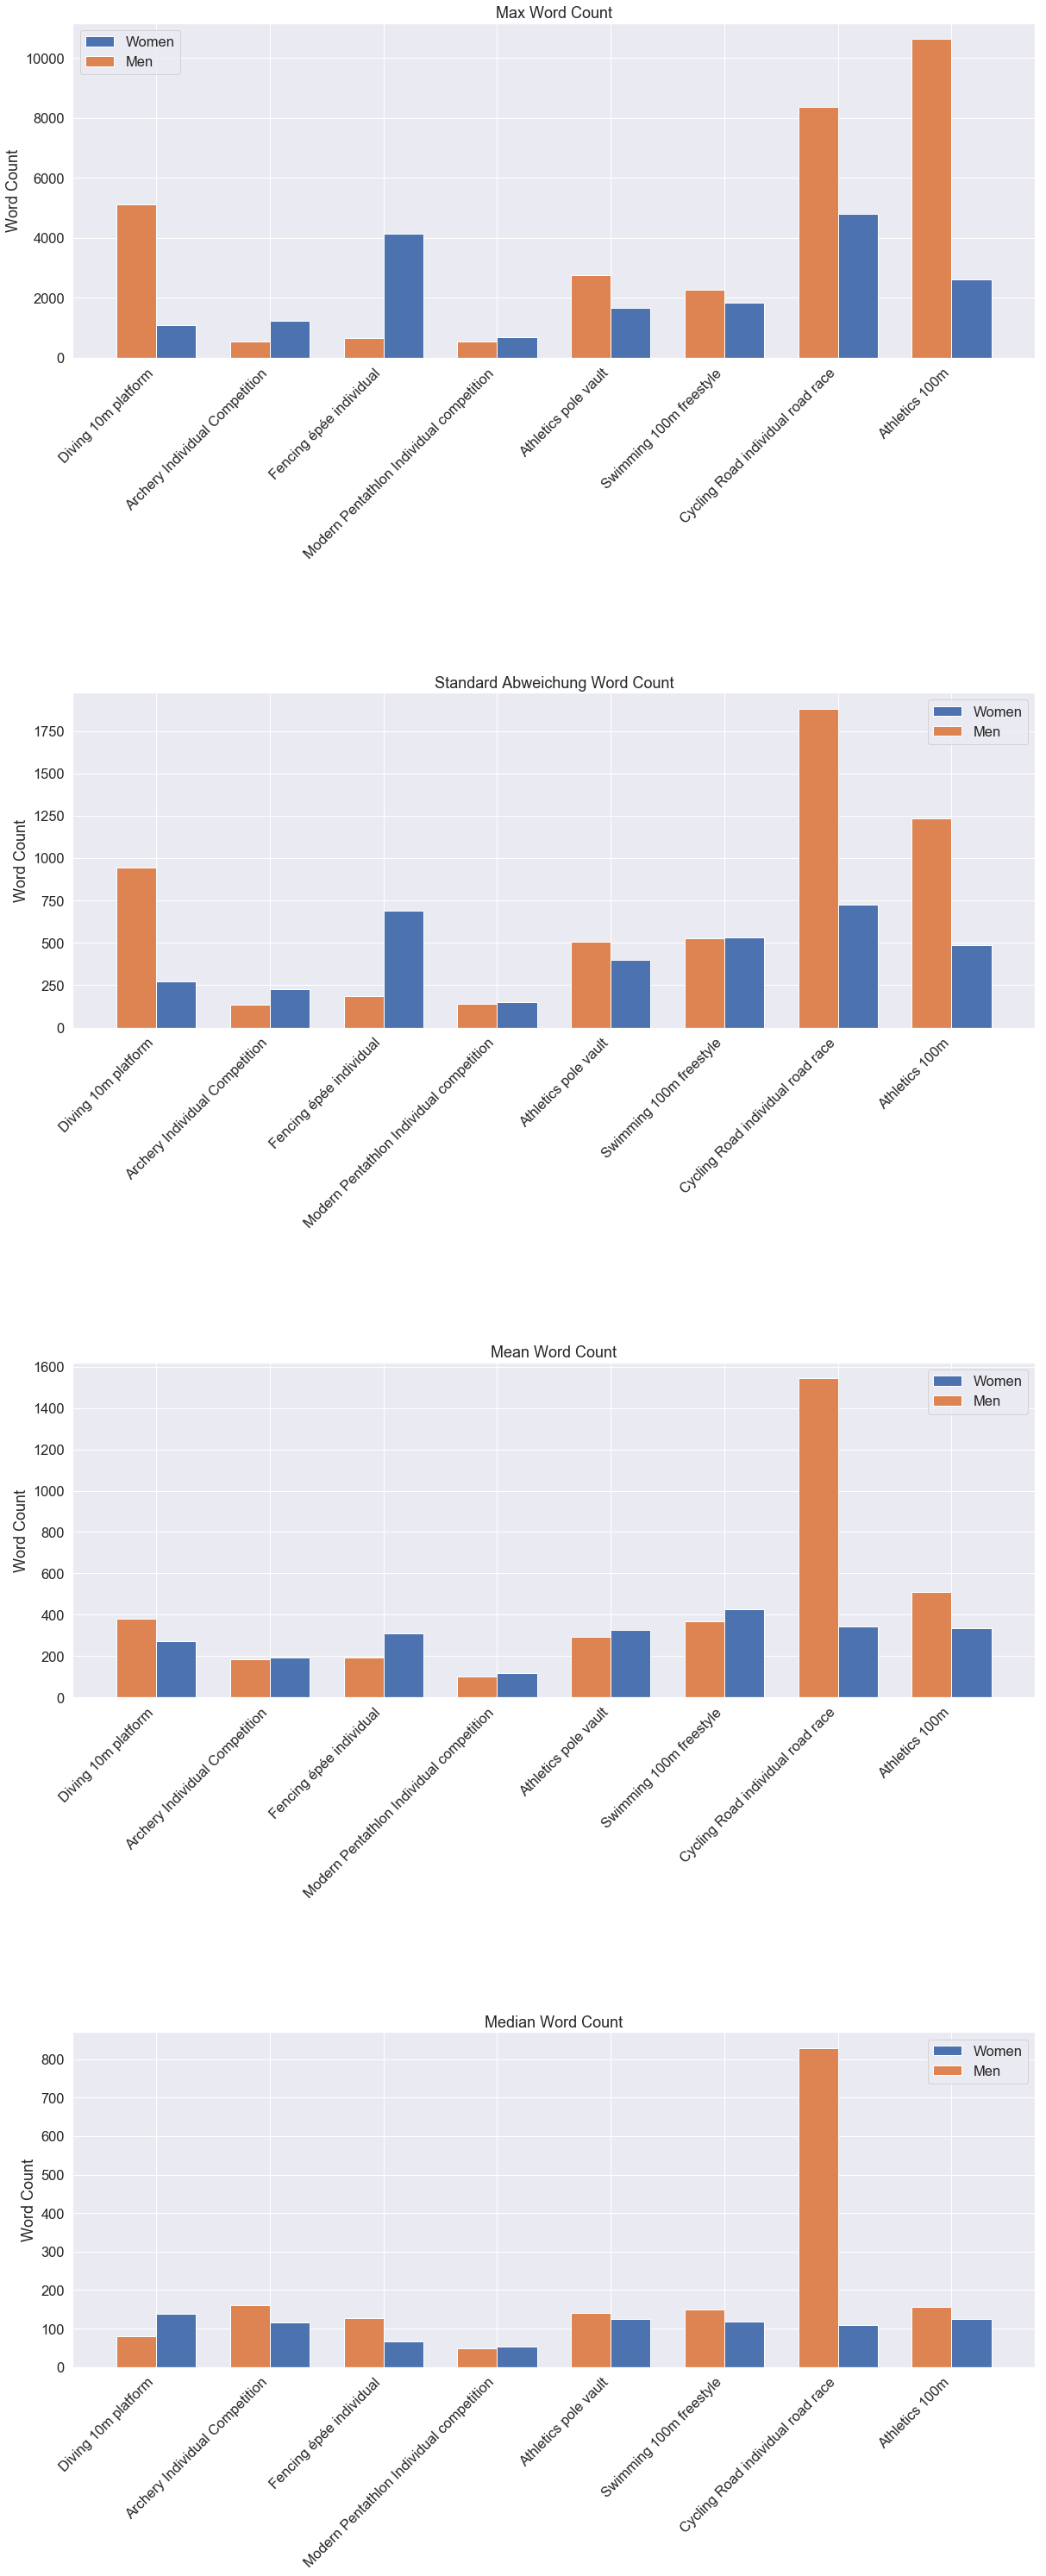

In [220]:
sns.set(font_scale=1.5)
sns.set_palette(palette=custom_scheme)
plot_wordcount(alldata)

In [150]:
#Extreme values on edit column
def extremes_per_sport_edits(data, gender):
    disciplines = data.Event.unique()
    indices = data.Description.unique()
    cols = ['Max_Edits', 'Min_Edits', 'Mean_Edits', 'Median_Edits']
    max = []
    min = []
    mean = []
    median = []
    variance = []
    stds = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Edits.max())
        min.append(all_for_discipline.Edits.min())
        mean.append(all_for_discipline.Edits.mean())
        median.append(all_for_discipline.Edits.median())
        variance.append(all_for_discipline.Wiki_Count.var())
        stds.append(all_for_discipline.Wiki_Count.std())
    return pd.DataFrame({'Max_Edits' :np.asarray(max),
                         'Min_Edits' :np.asarray(min),
                         'Mean_Edits':np.asarray(mean),
                         'Median_Edits':np.asarray(median),
                         'Variance':np.asarray(variance),
                         'Std': np.asarray(stds)}, index=indices)

In [208]:
def plot_edits(data):
    labels = data.Description.unique()
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_edits(data, 'Men')
    extremes_women = extremes_per_sport_edits(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(4, figsize=(20,50))
    fig.subplots_adjust(hspace=1)
    ax[0].bar(ind + width/2, extremes_women.Max_Edits, width, label='Women')
    ax[0].bar(ind - width/2, extremes_men.Max_Edits, width, label='Men')
    
    ax[0].legend()
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(labels)
    ax[0].set_ylabel('Edits')
    ax[0].set_title('Max Edits')
    ax[0].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
        
    ax[1].bar(ind + width/2, extremes_women.Std, width, label='Women')
    ax[1].bar(ind - width/2, extremes_men.Std, width, label='Men')
    
    ax[1].legend()
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(labels)
    ax[1].set_ylabel('Edits')
    ax[1].set_title('Standard Abweichung Edits')
    ax[1].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
    
    ax[2].bar(ind + width/2, extremes_women.Mean_Edits, width, label='Women')
    ax[2].bar(ind - width/2, extremes_men.Mean_Edits, width, label='Men')
    
    ax[2].legend()
    ax[2].set_xticks(ind)
    ax[2].set_xticklabels(labels)
    ax[2].set_ylabel('Edits')
    ax[2].set_title('Mean Edits')
    ax[2].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
    
    ax[3].bar(ind + width/2, extremes_women.Median_Edits, width, label='Women')
    ax[3].bar(ind - width/2, extremes_men.Median_Edits, width, label='Men')
    
    ax[3].legend()
    ax[3].set_xticks(ind)
    ax[3].set_xticklabels(labels)
    ax[3].set_ylabel('Edits')
    ax[3].set_title('Median Edits')
    ax[3].set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
 
#     plt.show()
    plt.savefig("../Latex/figures/editcount_extrema.png")

<Figure size 432x288 with 0 Axes>

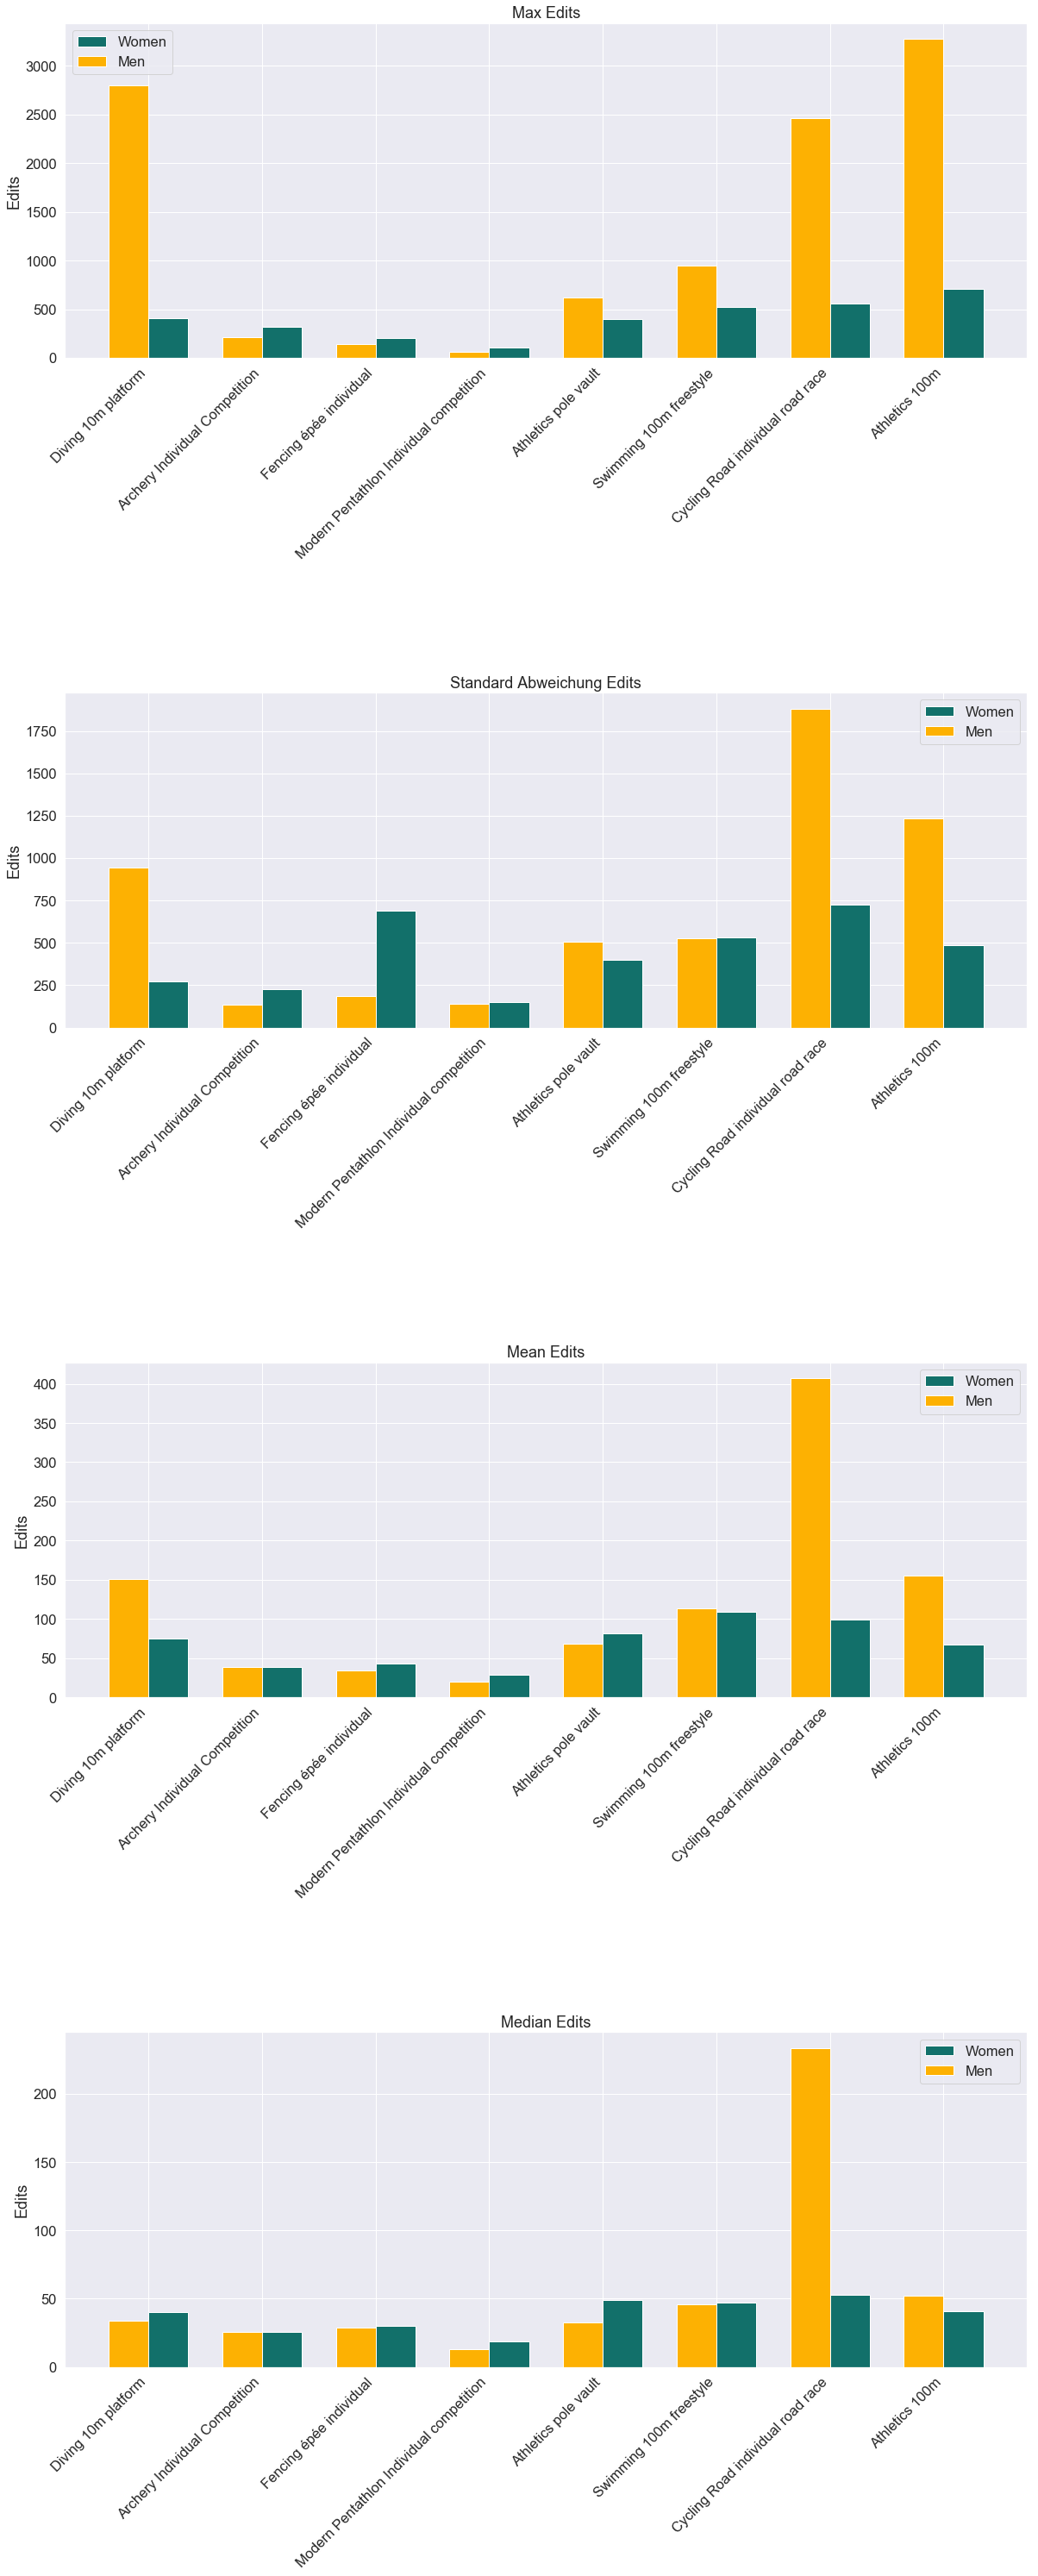

In [209]:
sns.set(font_scale=1.5)
sns.set_palette(palette=custom_scheme)
plot_edits(alldata)

In [153]:
extremes_per_sport_wordcount(alldata, 'Men')

,Max,Min,Mean,Median,Variance,Std
10m platform,5120,0,382.310345,79.0,8.924777e+05,944.710353
Individual Competition,546,0,182.281250,161.0,1.858535e+04,136.328090
épée individual,668,22,190.710526,126.0,3.547621e+04,188.351297
Individual competition,545,22,99.361111,48.0,1.953664e+04,139.773521
pole vault,2753,36,291.843750,139.5,2.550395e+05,505.014347
100m freestyle,2259,24,366.033898,150.0,2.800124e+05,529.161991
individual road race,8348,50,1543.433333,828.5,3.539053e+06,1881.237078
100m,10628,24,511.416667,156.0,1.526417e+06,1235.482582


In [154]:
extremes_per_sport_wordcount(alldata, 'Women')

,Max,Min,Mean,Median,Variance,Std
10m platform,1096,31,270.500000,137.5,74018.259259,272.062969
Individual Competition,1228,17,191.500000,116.0,50804.730159,225.399046
épée individual,4143,22,307.729730,67.0,475752.424925,689.748088
Individual competition,678,19,116.222222,54.0,22133.034921,148.771754
pole vault,1665,17,323.921053,125.0,160339.912518,400.424665
100m freestyle,1851,24,425.166667,119.0,284256.652482,533.157249
individual road race,4787,0,343.014925,108.0,524737.590683,724.387735
100m,2619,23,335.287500,124.5,237413.346677,487.250805


In [155]:
extremes_per_sport_edits(alldata, 'Men')

,Max_Edits,Min_Edits,Mean_Edits,Median_Edits,Variance,Std
Diving 10m platform,2796,0,150.379310,34.0,8.924777e+05,944.710353
Archery Individual Competition,211,0,38.593750,26.0,1.858535e+04,136.328090
Fencing épée individual,138,5,34.605263,29.0,3.547621e+04,188.351297
Modern Pentathlon Individual competition,58,4,20.000000,13.0,1.953664e+04,139.773521
Athletics pole vault,621,8,68.625000,32.5,2.550395e+05,505.014347
Swimming 100m freestyle,945,2,112.983051,46.0,2.800124e+05,529.161991
Cycling Road individual road race,2465,13,406.933333,233.5,3.539053e+06,1881.237078
Athletics 100m,3276,4,154.821429,52.0,1.526417e+06,1235.482582


In [156]:
extremes_per_sport_edits(alldata, 'Women')

,Max_Edits,Min_Edits,Mean_Edits,Median_Edits,Variance,Std
Diving 10m platform,403,3,74.464286,40.5,74018.259259,272.062969
Archery Individual Competition,321,1,38.156250,26.0,50804.730159,225.399046
Fencing épée individual,204,9,43.297297,30.0,475752.424925,689.748088
Modern Pentathlon Individual competition,107,5,28.916667,18.5,22133.034921,148.771754
Athletics pole vault,396,12,81.736842,49.0,160339.912518,400.424665
Swimming 100m freestyle,521,2,109.250000,47.0,284256.652482,533.157249
Cycling Road individual road race,557,0,99.462687,53.0,524737.590683,724.387735
Athletics 100m,710,1,67.600000,41.0,237413.346677,487.250805


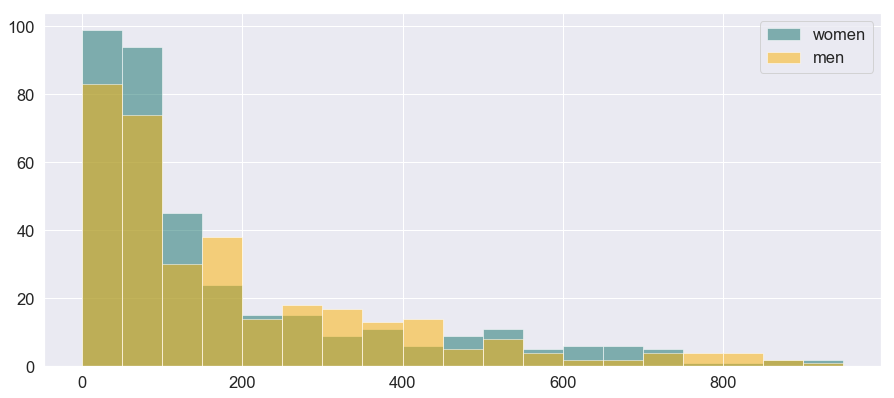

In [157]:
#gendered histogram of all word count data
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")

plt.legend()
plt.show()
# plt.savefig("wordcount_histogram.png")

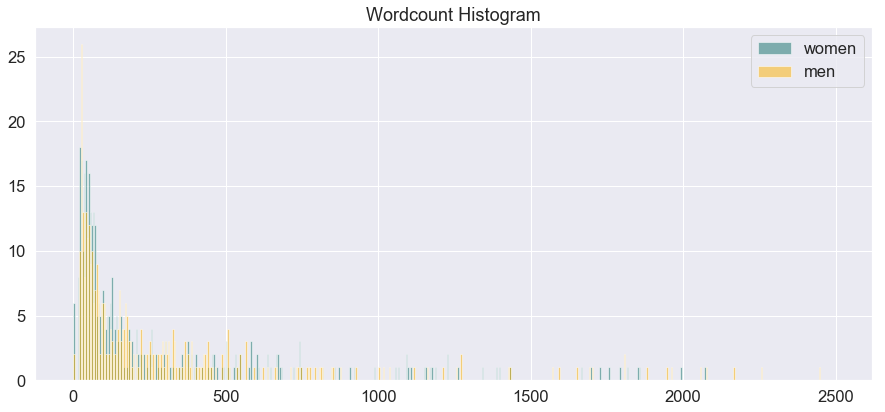

In [158]:
#gendered histogram of all word count data
sns.set(font_scale=1.5)
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count

bins = range(0, 2500, 5)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")

plt.legend()
plt.title("Wordcount Histogram")
# plt.show()
plt.savefig("../Latex/figures/editcount_small_bins_histogram.png")

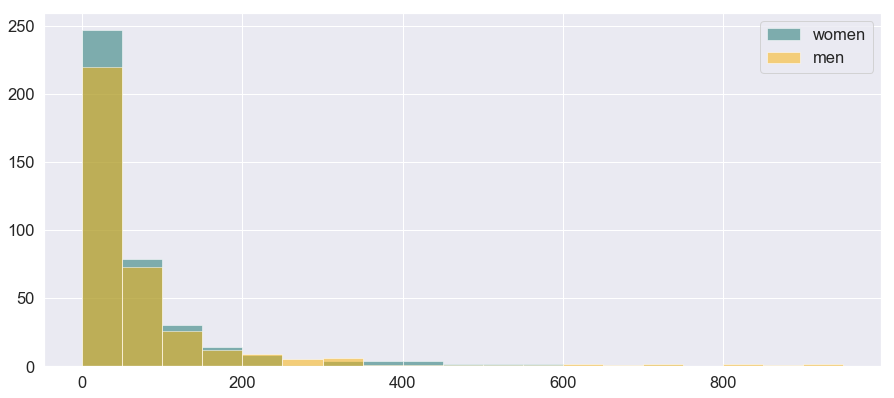

In [159]:
#gendered histogram of all edit data
men = alldata.loc[alldata['Gender'] == 'Men'].Edits
women = alldata.loc[alldata['Gender'] == 'Women'].Edits

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")


plt.legend()
plt.show()
# plt.savefig("editcount_histogram.png")

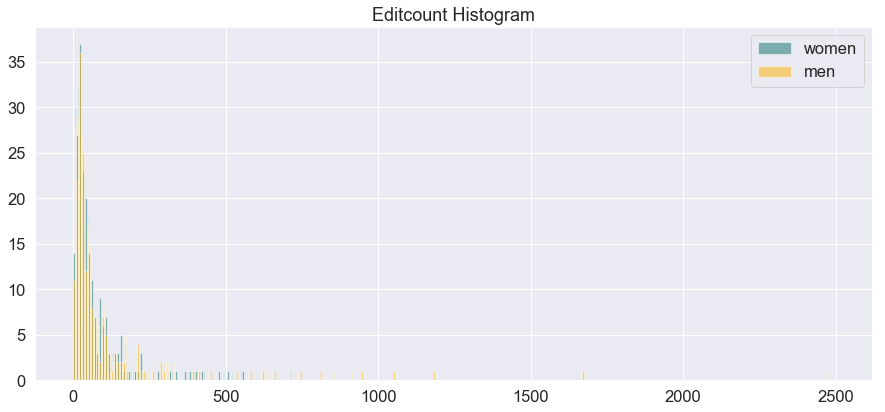

In [160]:
#gendered histogram of all edit data
men = alldata.loc[alldata['Gender'] == 'Men'].Edits
women = alldata.loc[alldata['Gender'] == 'Women'].Edits

bins = range(0, 2500, 5)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")
plt.title("Editcount Histogram")

plt.legend()
plt.savefig("../Latex/figures/editcount_small_bins_histogram")

In [161]:
#histograms using fancy seaborn but the result is kind of strange ...
# sns.set_palette(palette=czustom_scheme)
# g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
# g = (g.map(plt.hist,"Wiki_Count").set_titles("{col_name}"))
# g = g.map(sns.distplot, "Wiki_Count")
# g.savefig("wordcount_disciplines_distplot")

In [162]:
#same seaborn histograms but for edits instead of word count
# sns.set_palette(palette=custom_scheme)
# g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
# g = g.map(sns.distplot, "Edits")
# g.savefig("editcount_disciplines_distplot")

<Figure size 432x288 with 0 Axes>

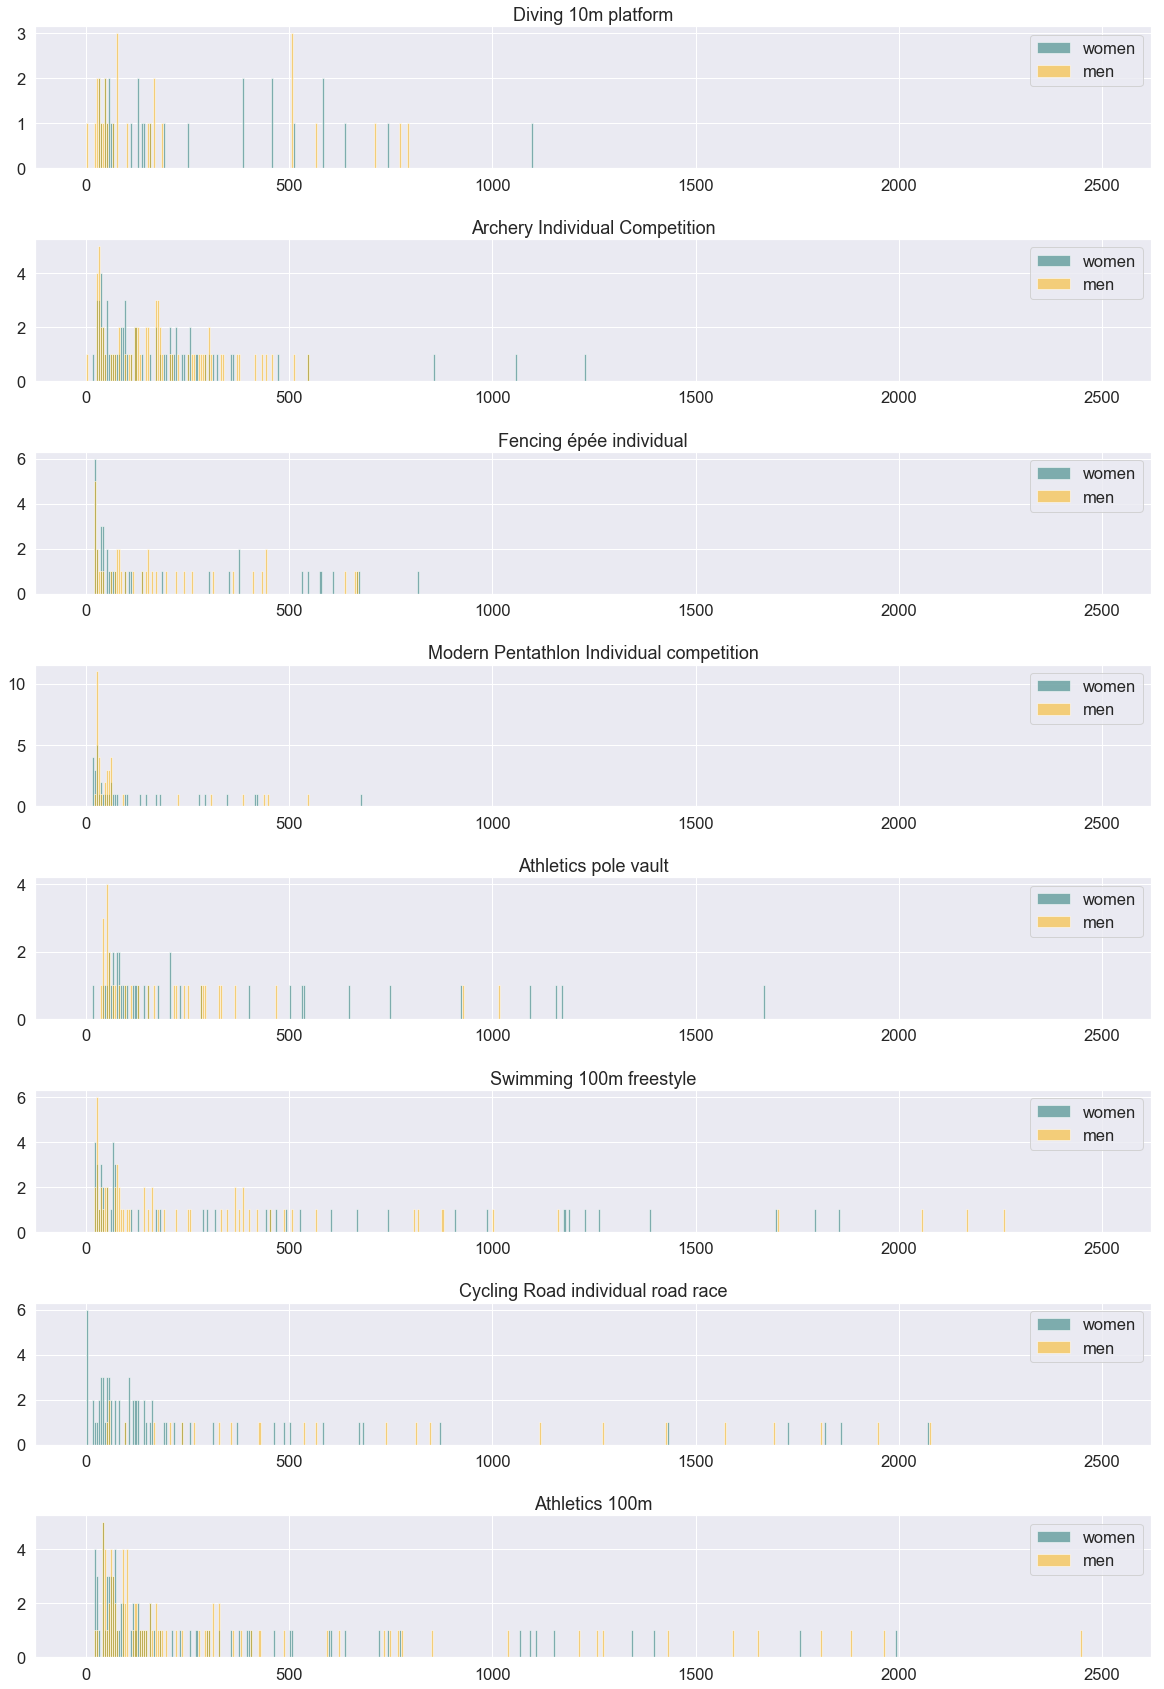

In [163]:
#word count histograms using normal matplotlib
sns.set(font_scale=1.5)
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#This plot doesn't show all data
bins = range(0, 2500, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="#12706A", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="#FDB102", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])
    
plt.savefig("../Latex/figures/wordcount_disciplines_histogram.png")

<Figure size 432x288 with 0 Axes>

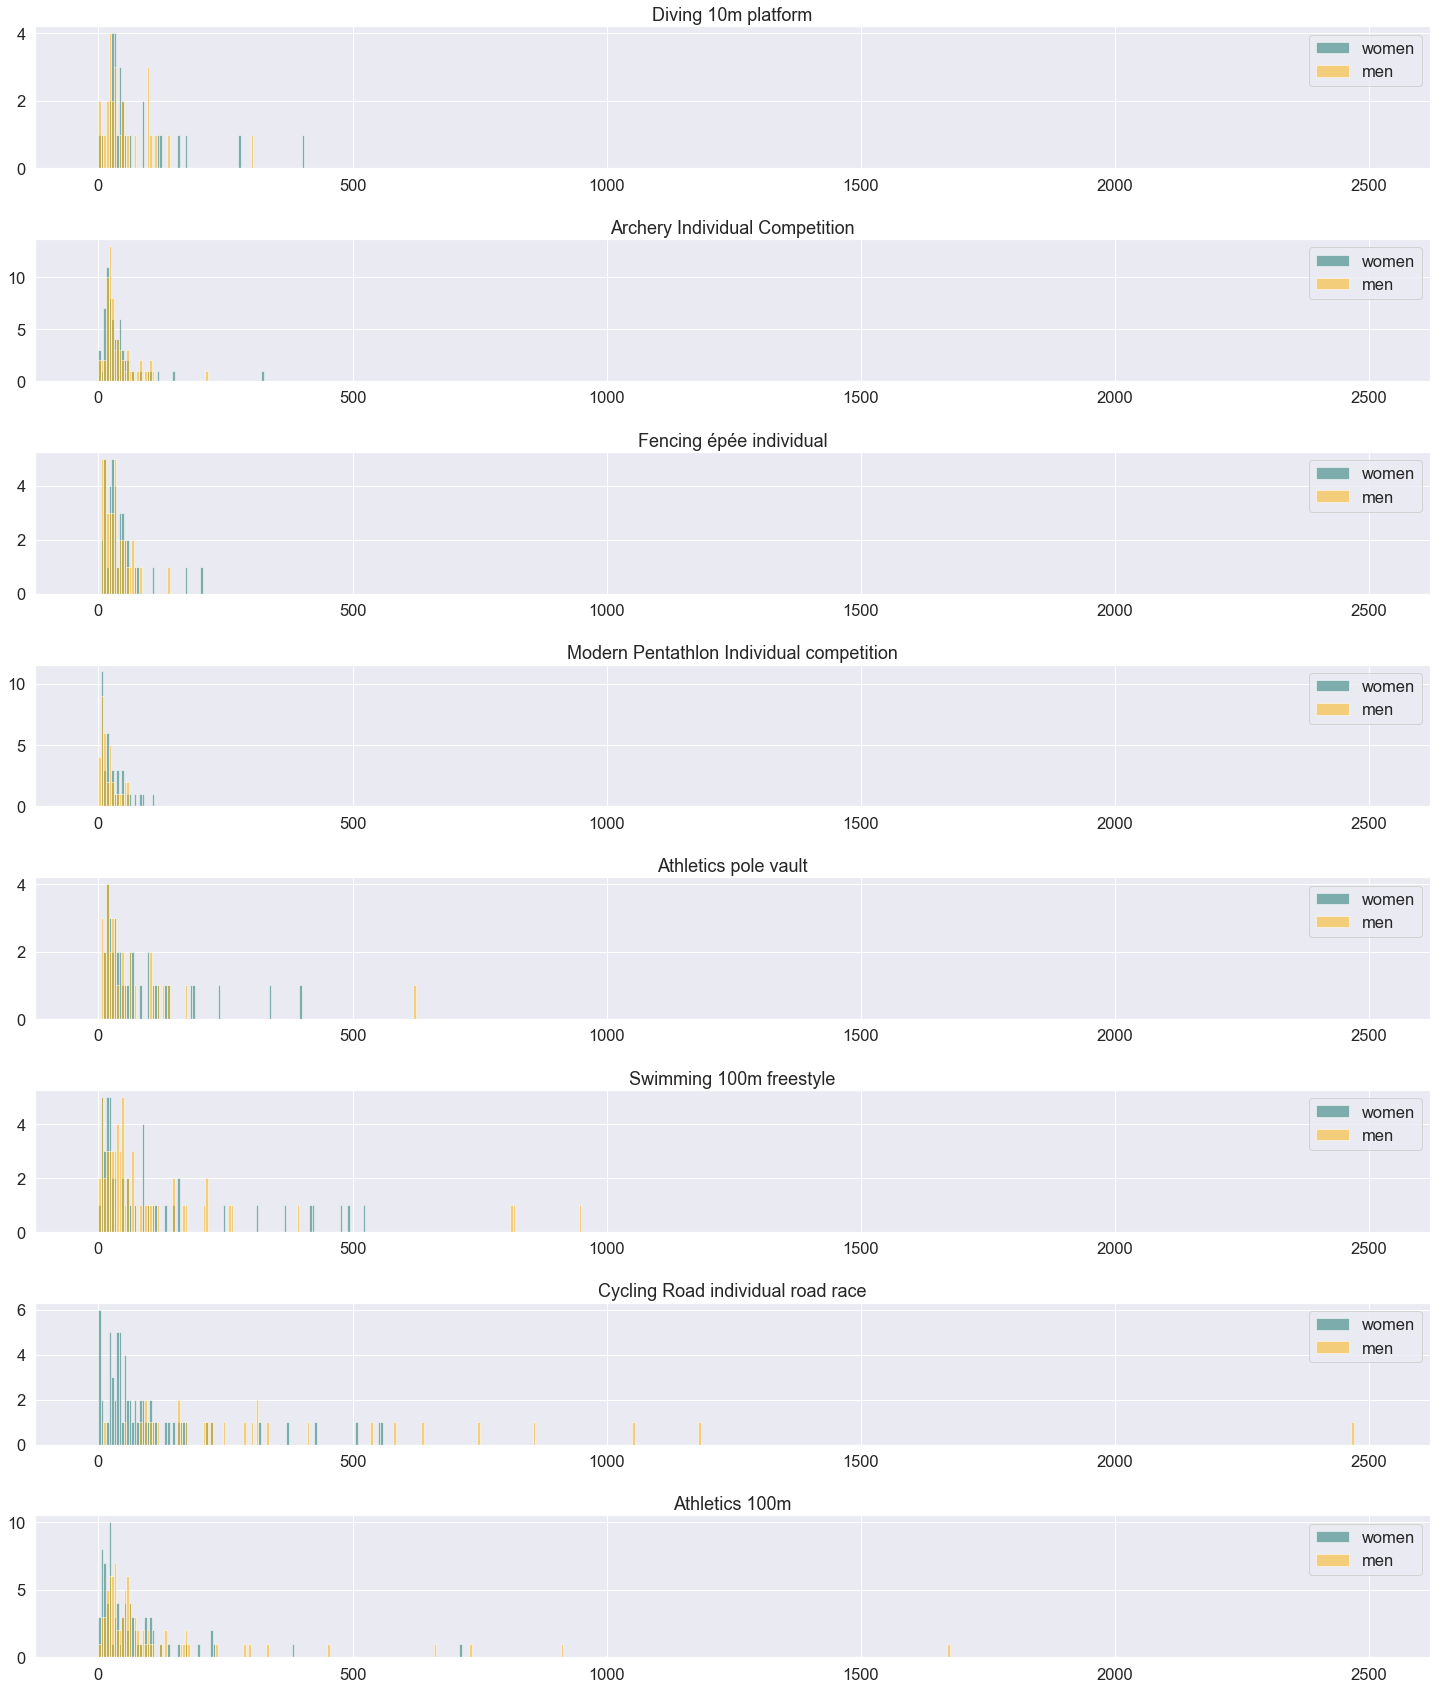

In [164]:
#edits histograms using normal matplotlib
sns.set(font_scale=1.5)
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
bins = range(0, 2500, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(25,30))
fig.subplots_adjust(hspace=0.5)
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Edits, bins, color="#12706A", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Edits, bins, color="#FDB102", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])


# plt.savefig("editcount_disciplines_histogram_contrast.png")
plt.savefig("../Latex/figures/editcount_disciplines_histogram.png")

In [165]:
#all ttests
# stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])
# men = alldata.loc[alldata['Gender'] == 'Men']
# women = alldata.loc[alldata['Gender'] == 'Women']
# all_disciplines = np.asarray(alldata.Event.unique())
# amout_of_disciplines = len(all_disciplines)
# ttest_results = []
# pvalues = []
# for discipline in all_disciplines:
#     ttest_result = stats.ttest_ind(men.loc[men['Event'] == discipline].Wiki_Count,
#                                          women.loc[women['Event'] == discipline].Wiki_Count)
#     ttest_results.append(ttest_result.statistic)
#     pvalues.append(ttest_result.pvalue)

# pd.DataFrame({'Discipline' :np.asarray(alldata.Description.unique()),
#               'Ttest Statistic' :np.asarray(ttest_results),
#               'P Value': np.asarray(pvalues)})

In [166]:
#Number of ppl of specified gender per sport
#This method is mostly for us
def gender_per_sport(data):
    disciplines = data.Event.unique()
    indices = data.Description.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Event'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Event'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=indices)

In [167]:
gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants

,f,m,equal
Diving 10m platform,28,29,false
Archery Individual Competition,64,64,true
Fencing épée individual,37,38,false
Modern Pentathlon Individual competition,36,36,true
Athletics pole vault,38,32,false
Swimming 100m freestyle,48,59,false
Cycling Road individual road race,67,30,false
Athletics 100m,80,84,false


In [168]:
# plt.figure(figsize=(15, 6.5))
# plot = sns.boxplot(x=allwomen.Description, y=allwomen.Wiki_Count, whis=[5,95], palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
# plot.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
# plt.savefig("../Latex/figures/boxplot_women.png")

In [169]:
# plt.figure(figsize=(15, 6.5))
# plot = sns.boxplot(x=allmen.Description, y=allmen.Wiki_Count, whis=[5,95], palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
# plot.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
# plt.savefig("../Latex/figures/boxplot_men.png")

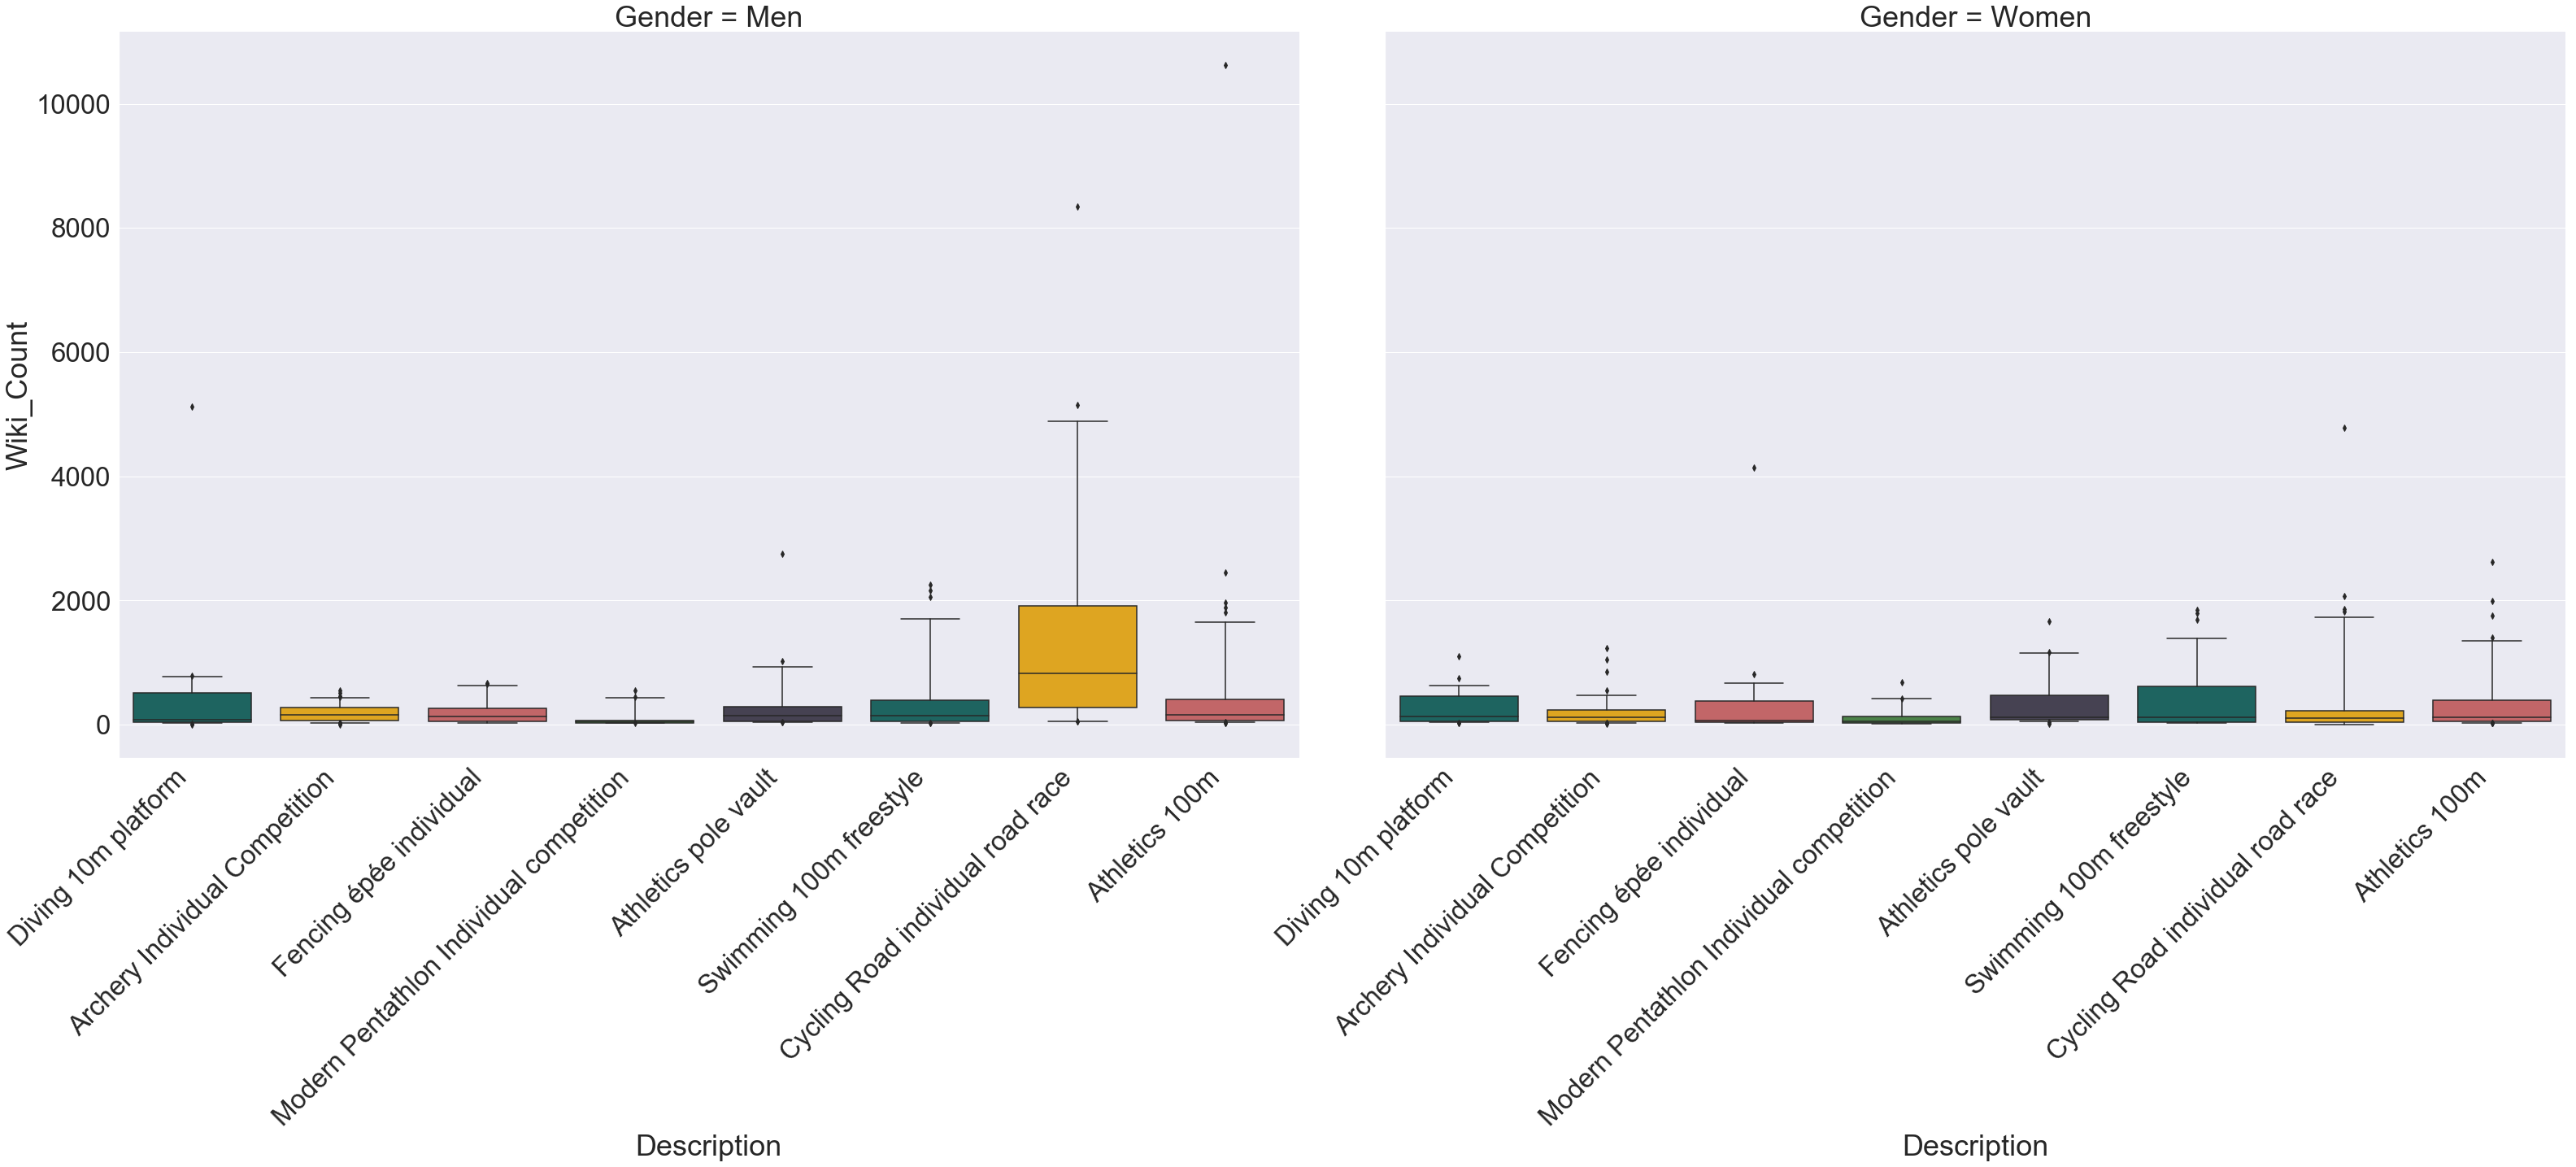

In [170]:
#boxplot for word count
sns.set(font_scale=3)
g = sns.FacetGrid(alldata, col="Gender", height=15, aspect=1.5)
plot= g.map(sns.boxplot,"Description", "Wiki_Count", whis=[5,95], order=alldata.Description.unique(), palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
plot.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
# for ax in g.axes.flatten():
#     ax.tick_params(labelbottom=True)
    
g.savefig("../Latex/figures/wordcount_boxplot.png")

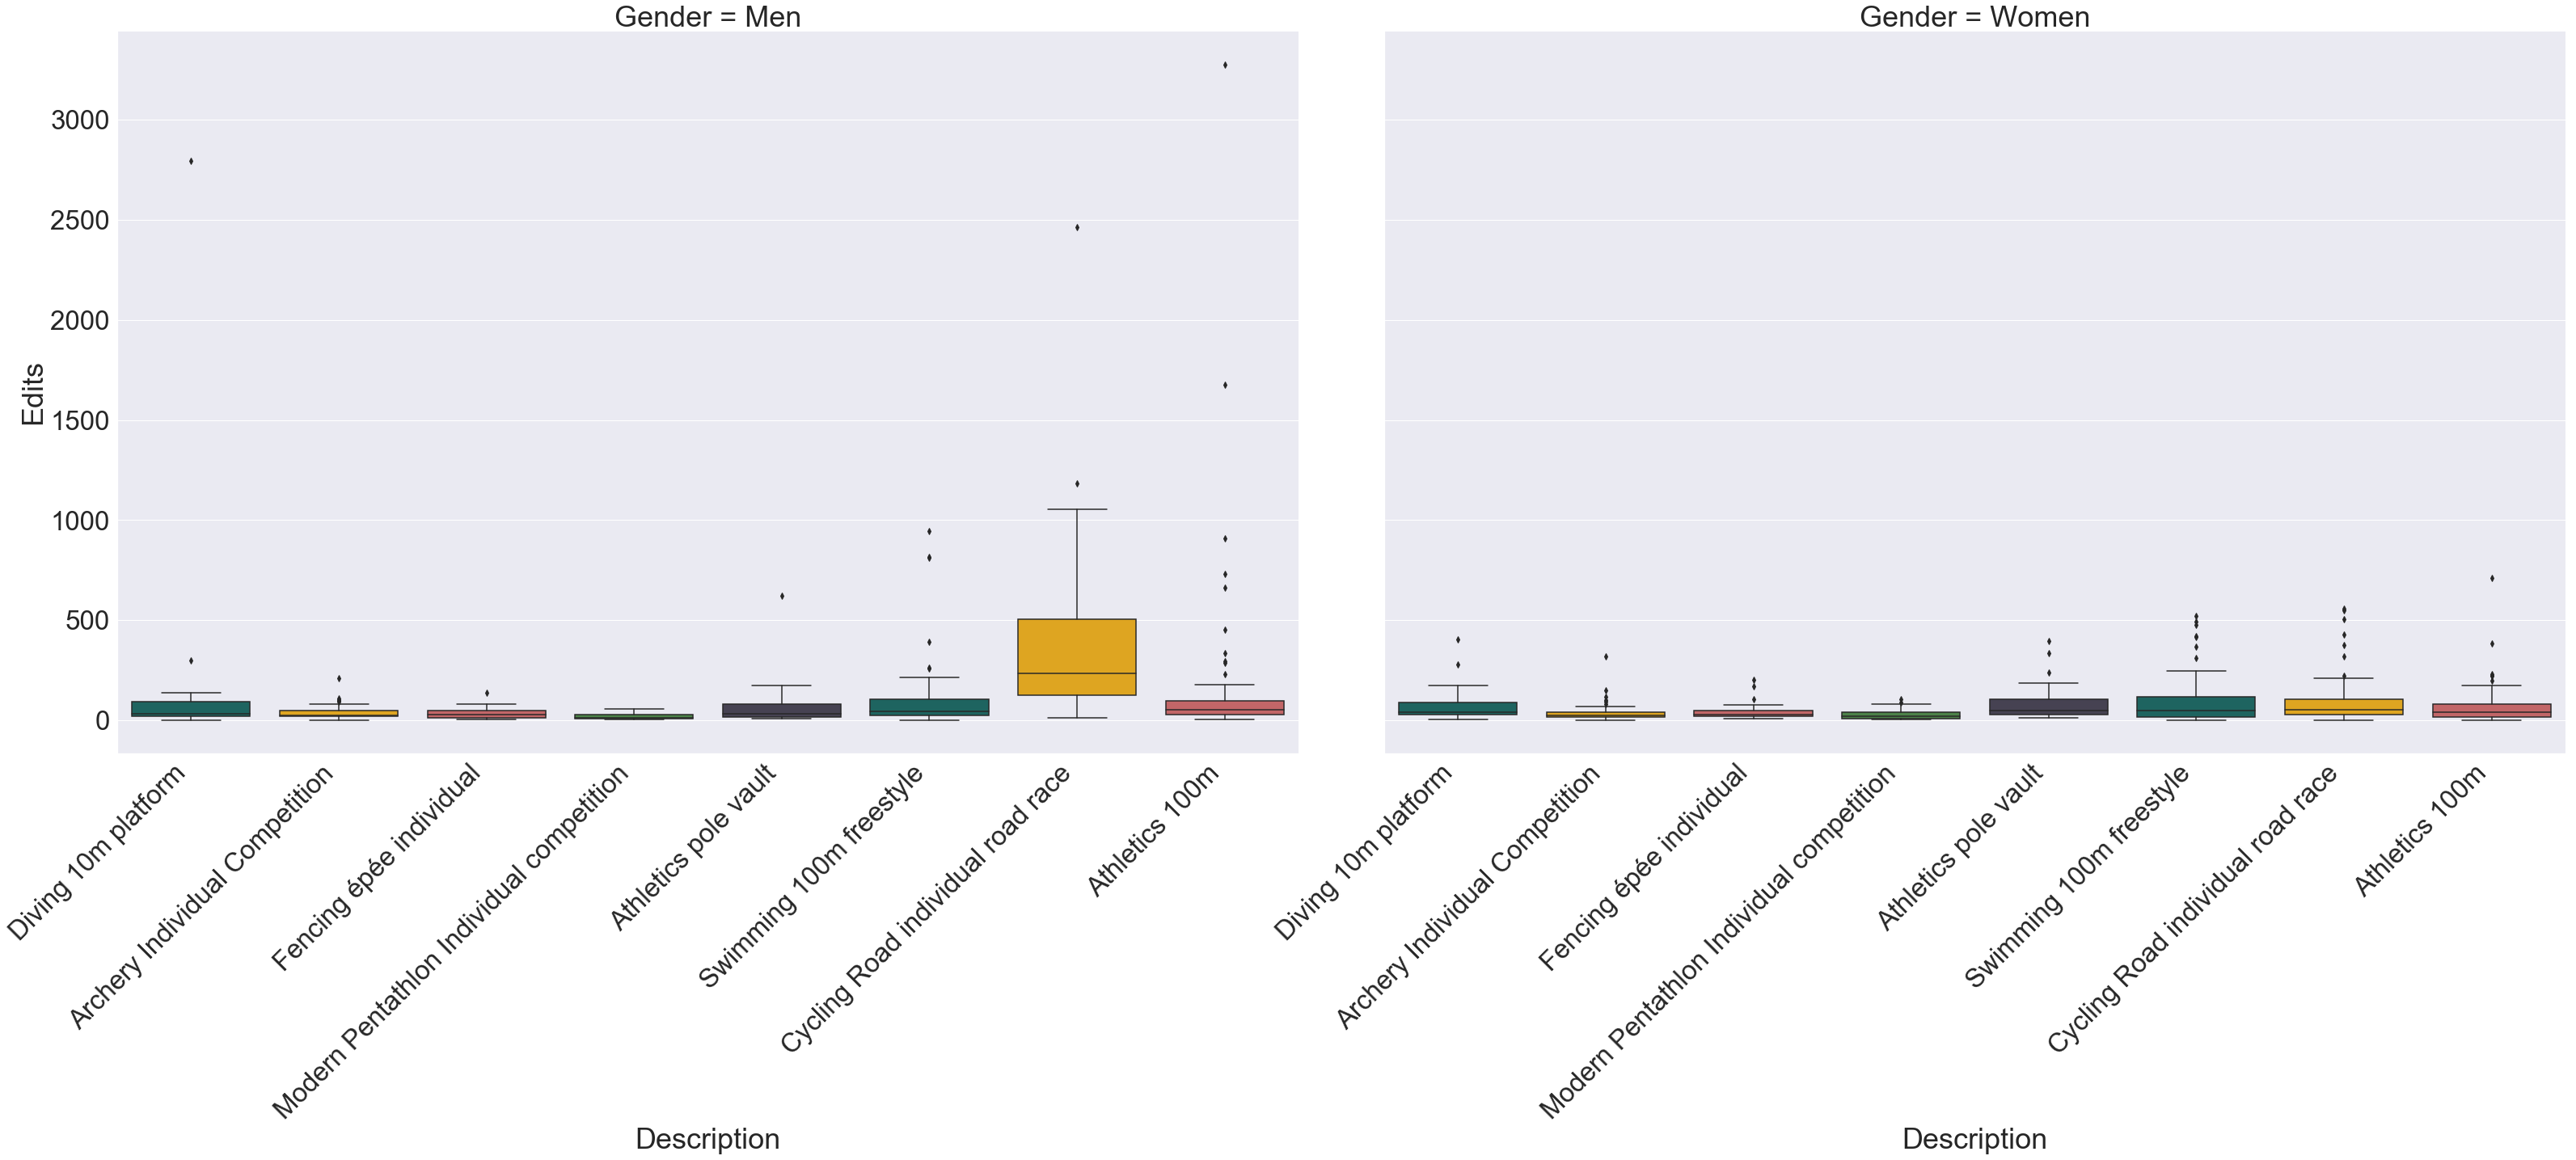

In [171]:
#boxplot for edits
g = sns.FacetGrid(alldata, col="Gender", height=15, aspect=1.5)
g.map(sns.boxplot,"Description", "Edits", order=alldata.Description.unique(), palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
g.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
g.savefig("../Latex/figures/editcount_boxplot.png")

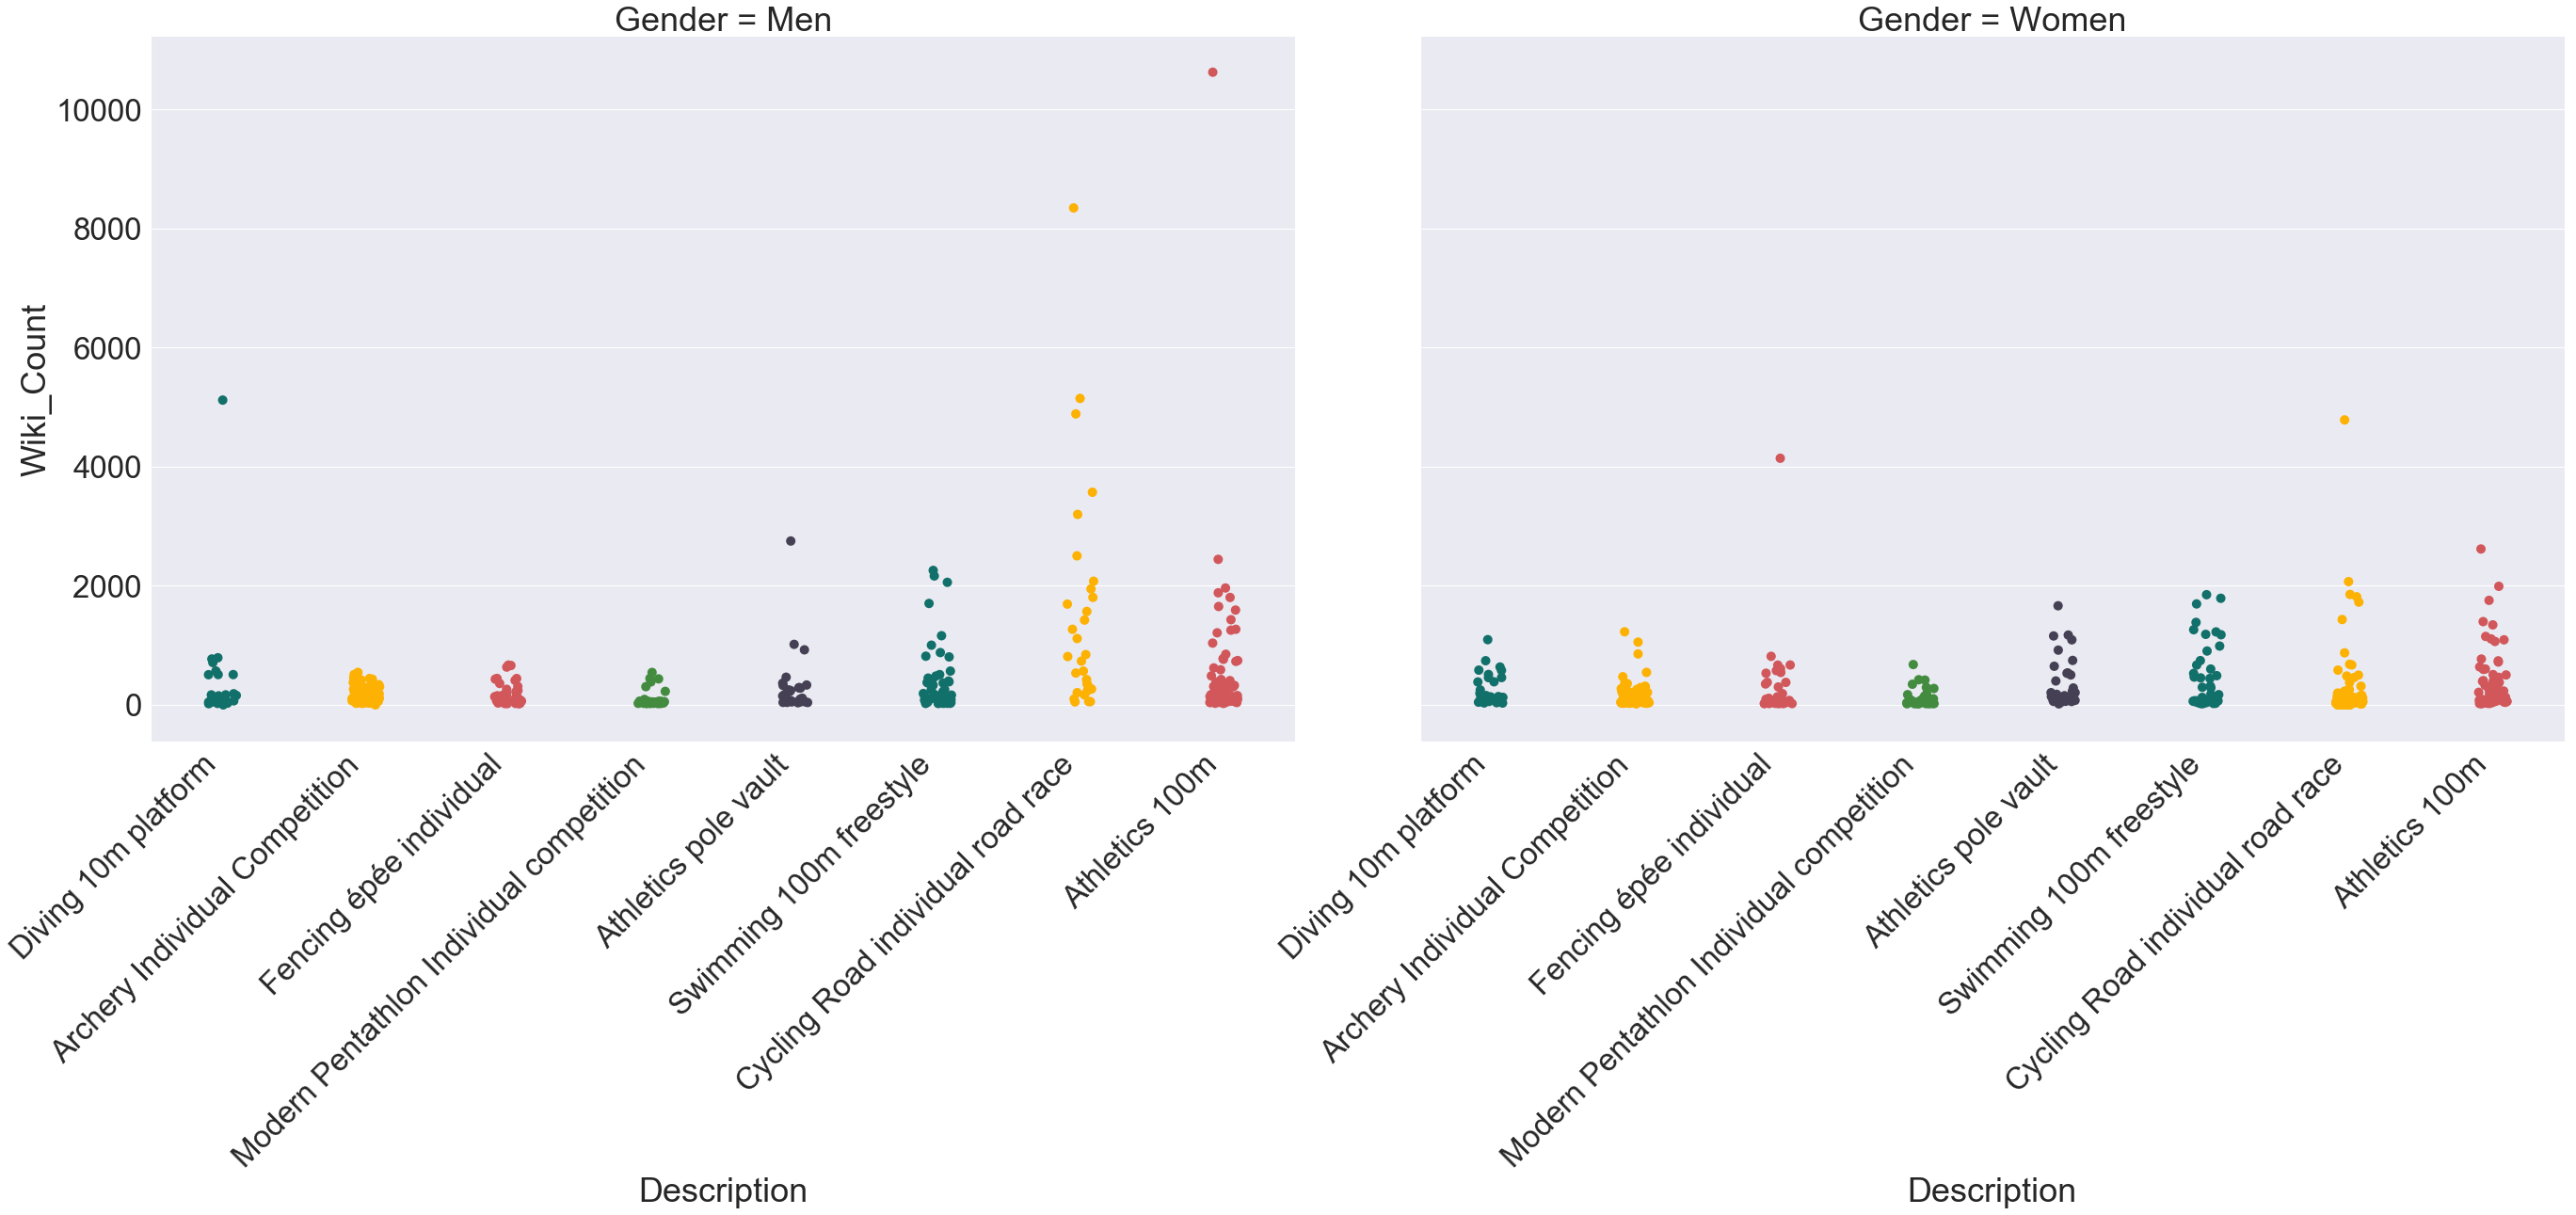

In [172]:
g = sns.FacetGrid(alldata, col="Gender",  height=13, aspect=1.5, hue="Description")
g.map(sns.stripplot,"Description", "Wiki_Count", order = alldata.Description.unique(), size=10,  palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
g.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
g.savefig("../Latex/figures/wordcount_stripplot.png")

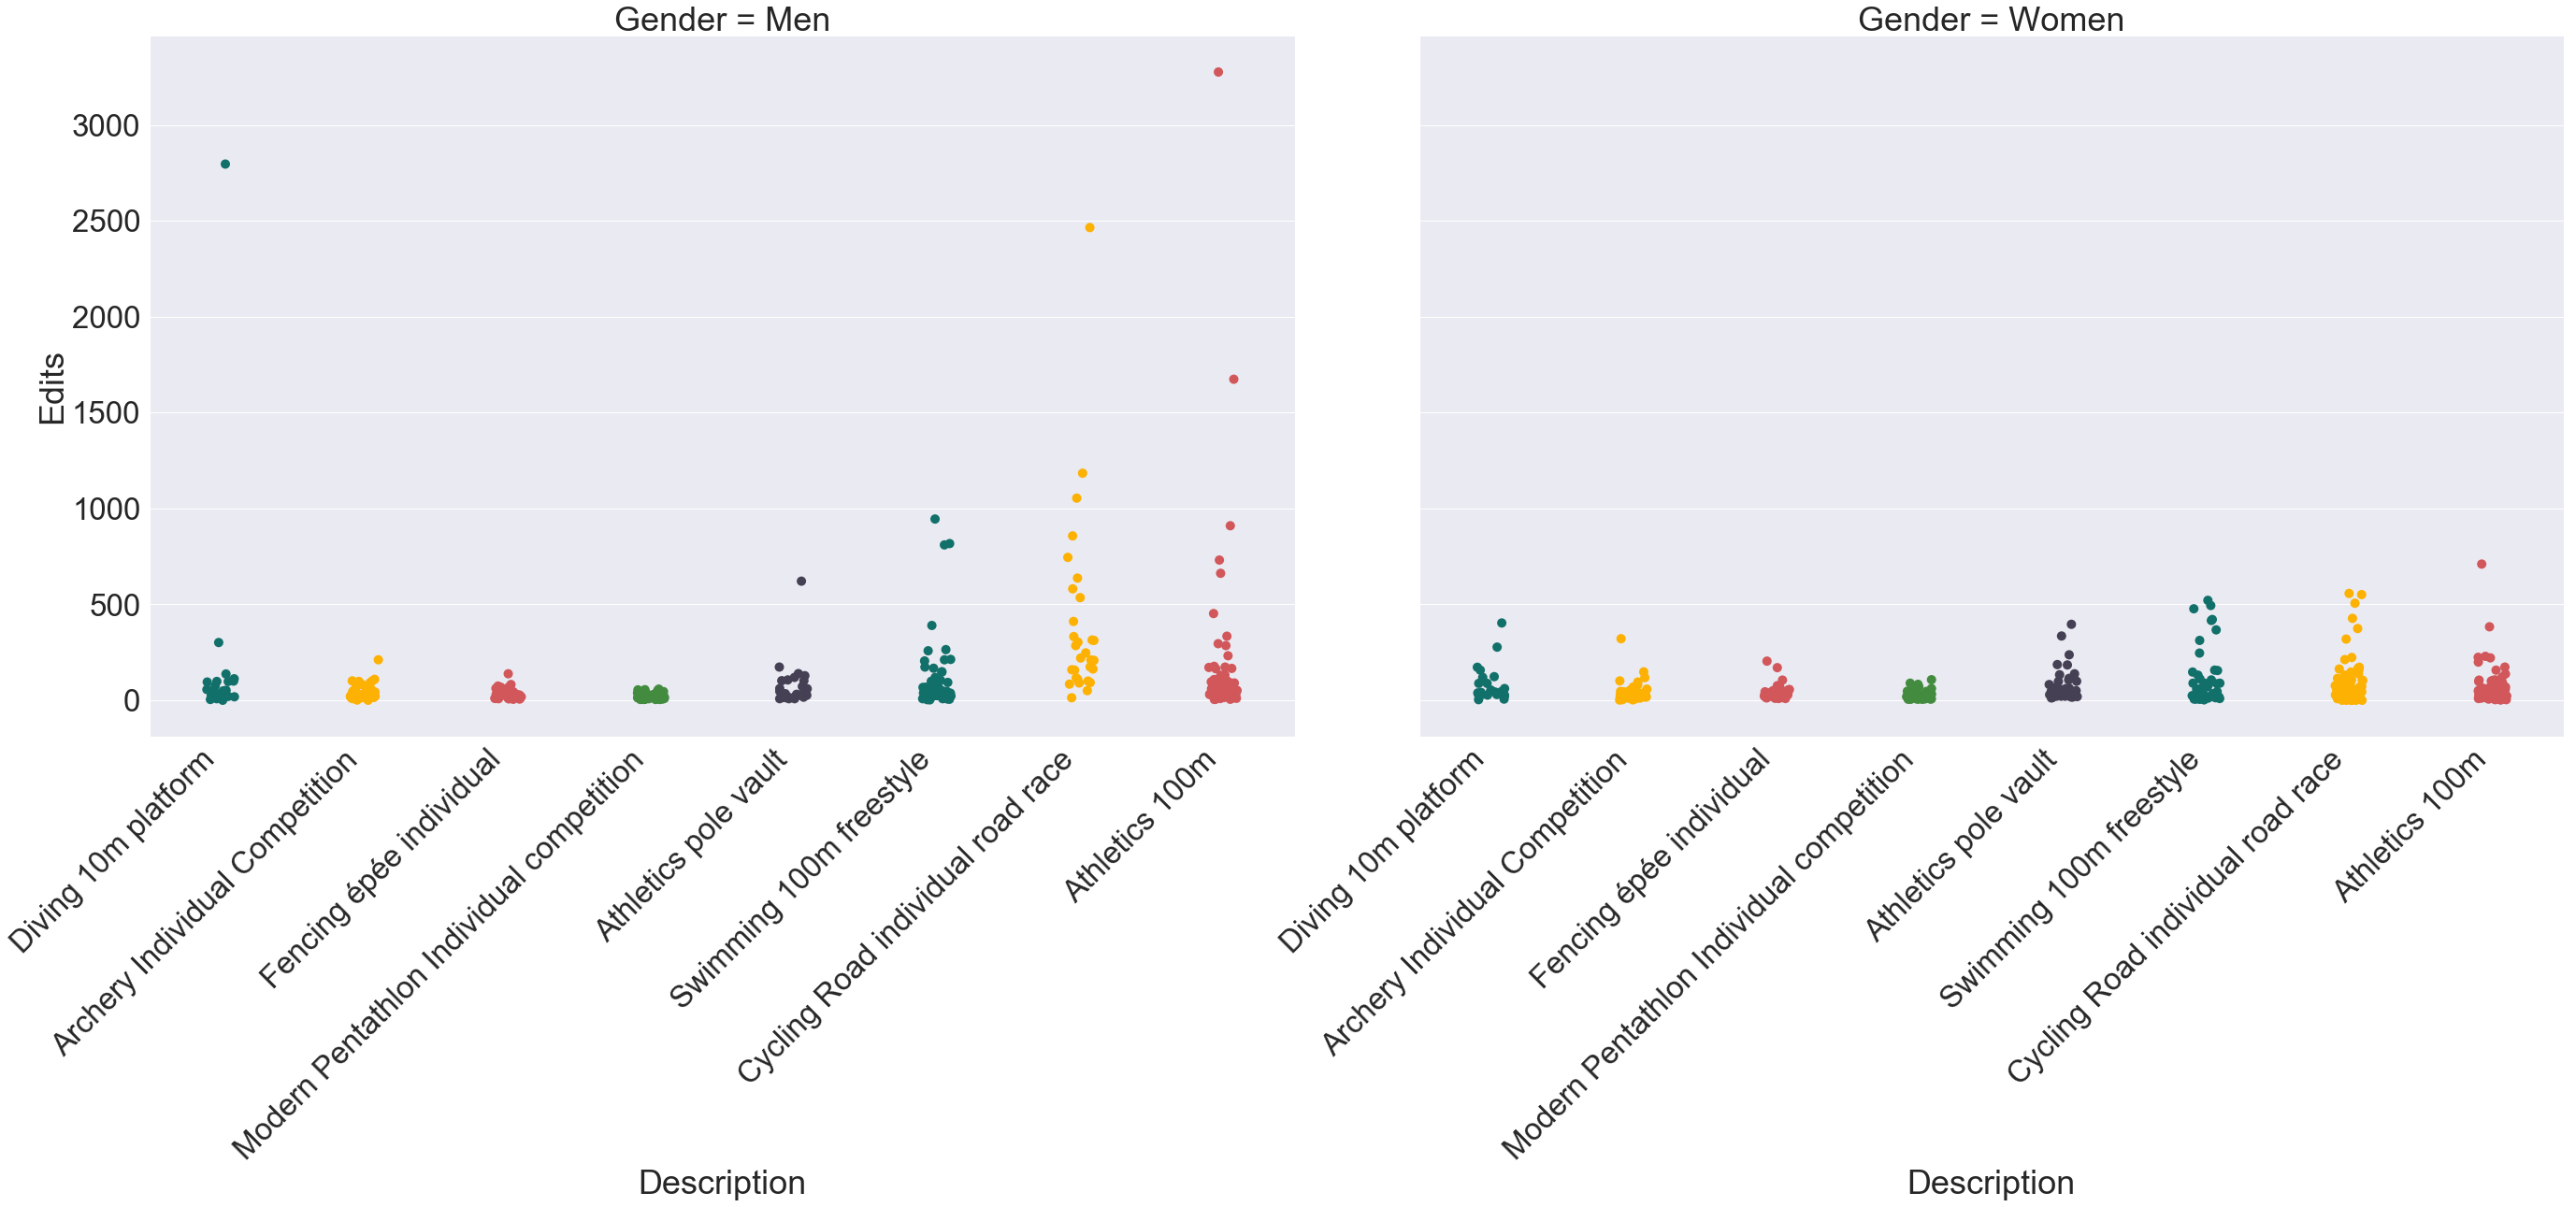

In [173]:
g = sns.FacetGrid(alldata, col="Gender",  height=13, aspect=1.5, hue="Description")
g.map(sns.stripplot,"Description", "Edits", order = alldata.Description.unique(),size=10, palette=["#12706A", "#FDB102", "#D1575A", "#438C3F", "#454054"])
g.set_xticklabels(alldata.Description.unique(), rotation=45, ha='right')
g.savefig("../Latex/figures/editcount_stripplot.png")

C:\Users\Josefine\AppData\Local\conda\conda\envs\ds_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


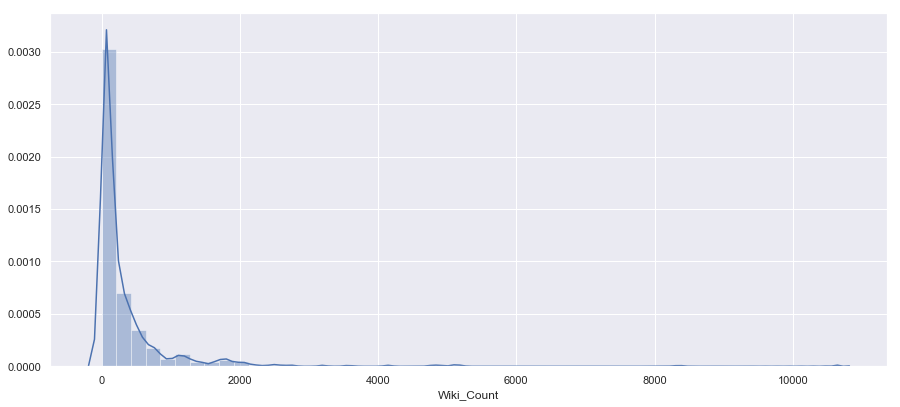

In [174]:
#histogram of all data for word count
# sns.set_palette(palette=custom_scheme)
sns.set(font_scale=1)
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Wiki_Count)
# plt.show()
plt.savefig("../Latex/figures/wordcount_histogram.png")

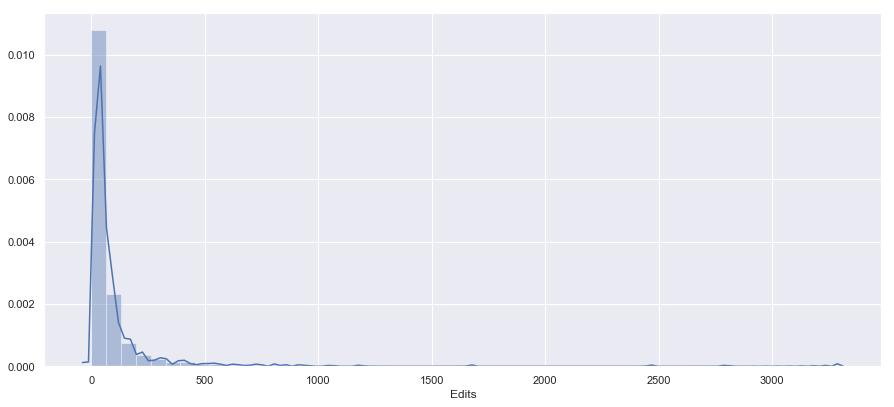

In [175]:
#histogram of all data for edits
sns.set(font_scale=1)
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Edits)
# plt.show()
plt.savefig("../Latex/figures/editcount_histogram.png")

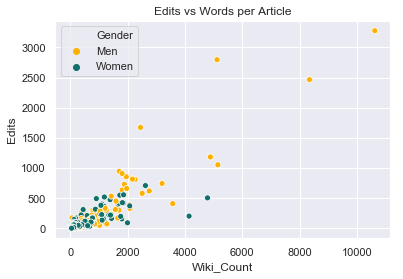

In [176]:
#scatterplot - hypothesis: the more words per article, the more edits
sns.scatterplot(x="Wiki_Count", y="Edits", hue="Gender", sizes=(10, 200), data=alldata, palette=["#FDB102", "#12706A"])
plt.title('Edits vs Words per Article')
plt.savefig("../Latex/figures/edits_vs_words.png")

In [177]:
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.
#Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
# Do the Wordcounts differ by the sex of the athlete?
#Source: https://www.statisticssolutions.com/mann-whitney-u-test/
stats.mannwhitneyu(men.Wiki_Count, women.Wiki_Count)

MannwhitneyuResult(statistic=68133.5, pvalue=0.02799997038752015)

In [178]:
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
utest_results = []
pvalues = []
significance = []
for discipline in all_disciplines:
    utest_result = stats.mannwhitneyu(men.loc[men['Event'] == discipline].Wiki_Count,
                                         women.loc[women['Event'] == discipline].Wiki_Count)
    utest_results.append(utest_result.statistic)
    pvalues.append(utest_result.pvalue)
    if utest_result.pvalue <= 0.05:
        significance.append("significant")
    else:
        significance.append("not significant")

pd.DataFrame({'Discipline' :alldata.Description.unique(),
#               'Utest Statistic' :np.asarray(utest_results),
              'P Value': np.asarray(pvalues),
              'Significance' : np.asarray(significance)})

,Discipline,P Value,Significance
0,Diving 10m platform,1.690800e-01,not significant
1,Archery Individual Competition,2.440222e-01,not significant
2,Fencing épée individual,2.906772e-01,not significant
3,Modern Pentathlon Individual competition,3.782122e-01,not significant
4,Athletics pole vault,2.451830e-01,not significant
5,Swimming 100m freestyle,4.563503e-01,not significant
6,Cycling Road individual road race,2.591859e-07,significant
7,Athletics 100m,9.354463e-02,not significant


In [179]:
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
utest_results = []
pvalues = []
significance = []
for discipline in all_disciplines:
    utest_result = stats.mannwhitneyu(men.loc[men['Event'] == discipline].Edits,
                                         women.loc[women['Event'] == discipline].Edits)
    utest_results.append(utest_result.statistic)
    pvalues.append(utest_result.pvalue)
    if utest_result.pvalue <= 0.05:
        significance.append("significant")
    else:
        significance.append("not significant")

pd.DataFrame({'Discipline' :alldata.Description.unique(),
#               'Utest Statistic' :np.asarray(utest_results),
              'P Value': np.asarray(pvalues),
              'Significance' : np.asarray(significance)})

,Discipline,P Value,Significance
0,Diving 10m platform,2.693526e-01,not significant
1,Archery Individual Competition,2.836403e-01,not significant
2,Fencing épée individual,1.809164e-01,not significant
3,Modern Pentathlon Individual competition,9.551464e-02,not significant
4,Athletics pole vault,6.945469e-02,not significant
5,Swimming 100m freestyle,3.770569e-01,not significant
6,Cycling Road individual road race,3.837596e-08,significant
7,Athletics 100m,2.755057e-02,significant
